<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Lab%201/Lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Business Understanding

## Forest Cover Type

This dataset looks at the ecological data on 4 areas from Roosevelt National Forest of northern Colorado. Sampling forest cover type for a 30x30 meter areas, determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. These areas have minimal human disturbance, in order to provide insight on ecological data over forest management.

As for primary major tree species in these areas:
### Neota 
- spruce/fir (type 1)

### Rawah and Comanche Peak
- lodgepole pine (type 2)
- spruce/fir and aspen (type 5)

### Cache la Poudre 
- Ponderosa pine (type 3)
- Douglas-fir (type 6)
- Cottonwood/willow (type 4)

### Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University. (source: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset)

## Predictions
### Classification
- This dataset can be leveraged to predict categorical values of cover type, based on elevation, slope, soil type, cover type, shadow coverage, and local topography (Using logistic regression or Random Forest).

In this analysis we used Accuracy to measure model performance, and in future iterations we will leverage:
  - Accuracy
  - Sensitivity
  - Specificity
  - Area Under the ROC curve

### Regression
Elevation can be predicted using this dataset, by leveraging a linear regression model.
Model performance will be measured using:
  - RMSE (Root mean squared error)
To measure the difference between predictions and actual.

### Measuring effectiveness
10 fold cross valudation will be leveraged.

The insights from this data are useful for understanding the ecology of cover types in the areas sampled were pulled from (Roosevelt National Forest of north Colorado). Trees are an important part of a healthy ecosystem in earth, as they store carbon dioxide, which helps to slow global warming.


In [ ]:
# Import packages

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas.plotting
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# read the files into a dataframe
forest_cover_type = pd.read_csv('covtype 3.csv') 

# verify the dataframe loaded
print(forest_cover_type.shape)
forest_cover_type.head()

## Data Meaning 

Attributes:	

- 10 quantitative variables
  - Elevation - Elevation in meters
  - Aspect - Aspect in degrees azimuth
  - Slope - Slope in degrees
  - Horizontal Distance to Hydrology - Horz Dist to nearest surface water features (meters)
  - Vertical Distance to Hydrology - Vert Dist to nearest surface water features (meters)
  - Horizontal Distance to Roadways - Horz Dist to nearest roadway (meters)
  - Hill shade 9 am (0 to 255 index) - Hillshade index at 9am, summer solstice
  - Hill shade noon (0 to 255 index) - Hillshade index at noon, summer solstice
  - Hill shade 3 pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
  - Horizontal distance to fire points - Horz Dist to nearest wildfire ignition points (meters)

- 4 binary wilderness areas 
  - Neota
  - Rawah
  - Comanche Peak
  - Cache la Poudre

- 7 Cover Types (Forest Cover Type designation)
  - 1: Spruce/Fir
  - 2: Lodgepole Pine
  - 3: Ponderosa Pine
  - 4: Cottonwood/Willow
  - 5: Aspen
  - 6: Douglas-fir
  - 7: Krummholz


- 40 binary soil type variables

	- 1: Cathedral family - Rock outcrop complex, extremely stony.
	- 2: Vanet - Ratake families complex, very stony.
	- 3: Haploborolis - Rock outcrop complex, rubbly.
	- 4: Ratake family - Rock outcrop complex, rubbly.
	- 5: Vanet family - Rock outcrop complex complex, rubbly.
	- 6: Vanet - Wetmore families - Rock outcrop complex, stony.
	- 7: Gothic family.
	- 8: Supervisor - Limber families complex.
	- 9: Troutville family, very stony.
	- 10: Bullwark - Catamount families - Rock outcrop complex, rubbly.
	- 11: Bullwark - Catamount families - Rock land complex, rubbly.
	- 12: Legault family - Rock land complex, stony.
	- 13: Catamount family - Rock land - Bullwark family complex, rubbly.
	- 14: Pachic Argiborolis - Aquolis complex.
	- 15: unspecified in the USFS Soil and ELU Survey.
	- 16: Cryaquolis - Cryoborolis complex.
	- 17: Gateview family - Cryaquolis complex.
	- 18: Rogert family, very stony.
	- 19: Typic Cryaquolis - Borohemists complex.
	- 20: Typic Cryaquepts - Typic Cryaquolls complex.
	- 21: Typic Cryaquolls - Leighcan family, till substratum complex.
	- 22: Leighcan family, till substratum, extremely bouldery.
	- 23: Leighcan family, till substratum - Typic Cryaquolls complex.
	- 24: Leighcan family, extremely stony.
	- 25: Leighcan family, warm, extremely stony.
	- 26: Granile - Catamount families complex, very stony.
	- 27: Leighcan family, warm - Rock outcrop complex, extremely stony.
	- 28: Leighcan family - Rock outcrop complex, extremely stony.
	- 29: Como - Legault families complex, extremely stony.
	- 30: Como family - Rock land - Legault family complex, extremely stony.
	- 31: Leighcan - Catamount families complex, extremely stony.
	- 32: Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
	- 33: Leighcan - Catamount families - Rock outcrop complex, extremely stony.
	- 34: Cryorthents - Rock land complex, extremely stony.
	- 35: Cryumbrepts - Rock outcrop - Cryaquepts complex.
	- 36: Bross family - Rock land - Cryumbrepts complex, extremely stony.
	- 37: Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
	- 38: Leighcan - Moran families - Cryaquolls complex, extremely stony.
	- 39: Moran family - Cryorthents - Leighcan family complex, extremely stony.
	- 40: Moran family - Cryorthents - Rock land complex, extremely stony.

## Data Quality
- There are no null values in this dataset
- We made adjustments to the numeric categorical columns for ease of use and understanding:
  - Soil type- from 40 to 1 column
  - Cover type- from 7 integer columns down to 1 column of a categorical string.
  - Wilderness area- from 4 integer columns down to 1 column of a categorical string.

- While we saw some outliers in terms of elevation for some cover types, there was no indication that this was an error. For example, Krummholz is known as a high elevation cover type.
- Similarly, we found higher populations of Spruce/Fir in the dataset vs. other cover types, but this is expected:
"Spruce-fir is among the most extensive forest types in Colorado, covering approximately 4.6 million acres or 19 percent of the state’s forested lands." (https://csfs.colostate.edu/colorado-forests/forest-types/spruce-fir/)
- We leveraged the pandas .duplicated() function to check for duplicate values, and did not find any in the data.

In [ ]:
# count the nulls
print(forest_cover_type.isnull().sum())
print('\n')
# count the frequency of each outcome
print(forest_cover_type['Cover_Type'].value_counts())

In [ ]:
#check for duplicates
bool_series = forest_cover_type.duplicated()
bool_series

In [ ]:
#Data clean-up
# make list of continuous variables
continuous_variables = ['Elevation', 
                        'Aspect', 
                        'Slope', 
                        'Horizontal_Distance_To_Hydrology', 
                        'Vertical_Distance_To_Hydrology',
                        'Horizontal_Distance_To_Roadways',
                        'Hillshade_9am','Hillshade_Noon',
                        'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points',
                        'Cover_Type']

# use list to make df
continuous_variables_df = forest_cover_type[continuous_variables]

# subset df to make binary categorical
# second number not inclusive
Wilderness_Area = forest_cover_type.iloc[:, 10:14]
Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)

# subset df to make binary categorical
# second number not inclusive
Soil_Type = forest_cover_type.iloc[:, 14:54]
Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)

# only keep the new column
Soil_Type = Soil_Type[['Soil_Type']]
Wilderness_Area = Wilderness_Area[['Wilderness_Area']]

# Add new columns to df
forest_cover_type['Soil_Type'] = Soil_Type
forest_cover_type['Wilderness_Area'] = Wilderness_Area

# make copy of df
forest_cover_type_copy = forest_cover_type.copy()

# delete first few characters in column so we only have number
forest_cover_type_copy['Soil_Type'] = forest_cover_type_copy['Soil_Type'].str[9:]
forest_cover_type_copy['Wilderness_Area'] = forest_cover_type_copy['Wilderness_Area'].str[15:]

# delete superfluous columns now that new columsn are added
forest_cover_type.drop(forest_cover_type_copy.iloc[:, 10:54], 
                       axis = 1, 
                       inplace = True)

# replace numerical categories with string for ease of understanding
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str.replace('Wilderness_Area1','Rawah')
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str.replace('Wilderness_Area2','Neota')
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str.replace('Wilderness_Area3','Comanche Peak')
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str.replace('Wilderness_Area4','Cache la Poudre')

forest_cover_type = forest_cover_type.astype({'Cover_Type':'string'})

forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('1','Spruce/Fir')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('2','Lodgepole Pine')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('3','Ponderosa Pine')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('4','Cottonwood/Willow')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('5','Aspen')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('6','Douglas-fir')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('7','Krummholz')

## Simple Statistics 

The average plot of land in this study was at just below 3,000 meters with all of them being between 1,859 and 3,858 meters. This mean plot also had an aspect of 155.7 degrees, or facing mostly south, with almost even distribution across the four caridnal directions and had a slope of 14 degrees. The maximum slope of land in this study was 66 degrees. However, 75% of the slope measurements were less than 18 degrees.

The mean plot of land sampled was was 269 meters horizontally and 46 meters vertically sperated from the nearest water source. While there were some outliers in the distance to hydrology, a large portion of the data lied within 384 meters horizontally and 69 meters vertically of a water source.

The mean distances a plot of land was from a roadway and a previous fire location were 2,350 meters and 1,980 meters respectively. Three-quarters of the plots were within 3,328 meters but the max distance seperated from a roadway was 7,117 meters. Similarily, most of the plots were closer to a previous fire point, with 75% being closer than 2,550 meters but the farthest being 7,173 meters away.

Finally, the amount of light received, or hillshade, each plot received was on average 212, 223, and 142 for 9am, Noon, and 3pm respectively.

In [ ]:
simpleStats = forest_cover_type.describe()
print(simpleStats)

simpleStats.reset_index(inplace=True)
num_col = forest_cover_type._get_numeric_data().columns
simpleStats = simpleStats[simpleStats['index'] != 'count']

fig1, ax1 = plt.subplots(1,2)
sns.lineplot(x='index',y='Elevation',data=simpleStats,ax=ax1[0])
sns.lineplot(x='index',y='Slope',data=simpleStats,ax=ax1[1])
fig1.show()
plt.figure()
sns.boxplot(x='Aspect',data=forest_cover_type)
fig2, ax2 = plt.subplots(1,2)
fig2.show()
sns.lineplot(x='index',y='Horizontal_Distance_To_Hydrology',data=simpleStats,ax=ax2[0])
sns.lineplot(x='index',y='Vertical_Distance_To_Hydrology',data=simpleStats,ax=ax2[1])
fig3, ax3 = plt.subplots(1,2)
sns.lineplot(x='index',y='Horizontal_Distance_To_Roadways',data=simpleStats,ax=ax3[0])
sns.lineplot(x='index',y='Horizontal_Distance_To_Fire_Points',data=simpleStats,ax=ax3[1])
fig3.show()
fig4, ax4 = plt.subplots(1,3)
sns.lineplot(x='index',y='Hillshade_9am',data=simpleStats,ax=ax4[0])
sns.lineplot(x='index',y='Hillshade_Noon',data=simpleStats,ax=ax4[1])
sns.lineplot(x='index',y='Hillshade_3pm',data=simpleStats,ax=ax4[2])
fig4.show()

In [ ]:
simpleStats

## Visualize Attributes

## Aspect and Slope
This distribution plot shows the direction that the sampled plots were facing on various slopes. 0 degrees and 360 degrees are oriented due North with 180 degrees being due South. This plot shows that most of the land was facing Northeast and decreased steadily with the lowest number of landplots facing Southwest.

In [ ]:
aspectDF = forest_cover_type[['Aspect','Cover_Type']].copy()
cardBins = [0, 45, 135, 225, 315, 360]
cardLabels = ['North', 'East', 'South', 'West', 'North']
aspectDF['Cardinal'] = pd.cut(aspectDF['Aspect'],
                              bins = cardBins,
                              labels = cardLabels,
                              ordered = False)
sns.displot(x = 'Aspect',
            hue = 'Cardinal',
            data = aspectDF).set(title = 'Slope aspect of plot in degrees')
plt.show()

## Slope

The histogram of the slopes surveyed shows that the data is slightly right skewed, meaning that most of the cover type were evaulated at lower degrees. However, there were plots of land that had increasingly steeper slopes. Further investigation will look at any potential relationships between these higher degree slopes and if they relate to a certain cover type or higher elevations.

In [ ]:
sns.histplot(x = 'Slope',
             bins = 22,
             data = forest_cover_type, 
             color = 'firebrick').set(title = 'Distribution of plot slopes in degrees')
plt.show()             

## Hillshade
- When we look at the summary statistics for Hillshade, we see a similar profile between the 9 am, noon, and 3pm variables. This will be important to look at more closely (covariance) for using these variables in a model.

In [ ]:
# make list of hillside variables
hillside = ['Hillshade_9am','Hillshade_Noon',
                        'Hillshade_3pm']
hillside_df=simpleStats[hillside]
ax=sns.lineplot(data=hillside_df)

#ax.set_xticks(7) 
ax.set_xticklabels(['mean','mean', 'std', 'min', '25%', '50%', '75%', 'max'])
hillside_df

In [ ]:
# Correlation df
cormat = hillside_df.corr()
# Round to two decimals
round(cormat, 2)

# heatmap of the correlations
matrix = np.triu(np.ones_like(cormat, dtype=bool))
sns.heatmap(cormat, annot = True, mask = matrix);

## Cover Type

- Looking at the box plot graph below, we can see marked differences in the elevation of various cover types. 

- In particular, Krummholz is a group of species of trees which do well at higher elevations: 
"Krummholz (German: krumm, "crooked, bent, twisted" and Holz, "wood") — also called knieholz ("knee timber") — is a type of stunted, deformed vegetation encountered in the subarctic and subalpine tree line landscapes, shaped by continual exposure to fierce, freezing winds." reference (https://en.wikipedia.org/wiki/Krummholz)'

- We also see large differences in the sample sizes for various cover types.

In [ ]:
sns.set(rc={'figure.figsize':(24.7,5.27)})

#side by side plot
fig, ax =plt.subplots(1,2)

# box plots for elevation vs cover type
sns.boxplot(x = 'Cover_Type', y = 'Elevation', data = forest_cover_type, ax=ax[0], palette=["m", "g", "b", "c", "r", "w", "m"])

# count plot for cover type
sns.countplot(forest_cover_type['Cover_Type'],  ax=ax[1], palette=["m", "g", "b", "c", "r", "w", "m"])
fig.show()

## Elevation

- Looking at the distribution of cover types, we can see the distribution of cover type has a bell shaped curve, with a sample of outliers on either side of the axis.
- When we are predicting elevation, we will need to work to find which patterns can help to identify some of the lower and upper outliers in elevation. 

In [ ]:
# distribution plot for elevation in SMU Blue

sns.displot(forest_cover_type['Elevation'], 
            color = '#0033A0', 
            height = 5.27, 
            aspect = 12.27 / 5.27)
plt.show()

In [ ]:
# Function for Hist Viz

def histogram_and_boxplot(df_column):
    f, (ax_box, ax_hist) = plt.subplots(2, 
                                        sharex = True, 
                                        gridspec_kw = {"height_ratios": (.15, .85)})
    sns.set(style = "ticks")
    flierprops = dict(marker = 'o', 
                      markersize = 4, 
                      markerfacecolor = 'none', 
                      linestyle = 'none', 
                      markeredgecolor = 'blue')
    text  = 'Std dev: ' + str(round(df_column.std(), 2)) + '\n'
    text += 'Mean: ' + str(round(df_column.mean(), 2)) + '\n'
    text += 'Median: ' + str(round(df_column.median(), 2)) + '\n'
    text += 'Skew: ' + str(round(df_column.skew(), 2)) + '\n'
    text += 'Kurt: ' + str(round(df_column.kurt(), 2))
    plt.text(0.95, 
             0.5, 
             text, 
             fontsize = 10, 
             transform = plt.gcf().transFigure)
    plt.axvline(df_column.median(), 
                color = 'k', 
                linestyle = 'dashed', 
                linewidth = 1)
    sns.boxplot(x = df_column, 
                ax = ax_box, 
                fliersize = 4, 
                width = 0.50, 
                linewidth = 1,
                flierprops = flierprops)
    sns.histplot(x = df_column, 
                 ax = ax_hist)
    ax_box.set(yticks = [])
    sns.despine(ax = ax_hist)   
    sns.despine(ax = ax_box)  
    plt.show()

## Distance Variables 

When looking at Distance:
- Horizontal & Vertical to Hydrology
- Horizontal to Fire Points
- Horizontal to Roadways

We see similar patterns of data in both Fire points/Roadways, which may indicate that these 2 variables aren't independent.

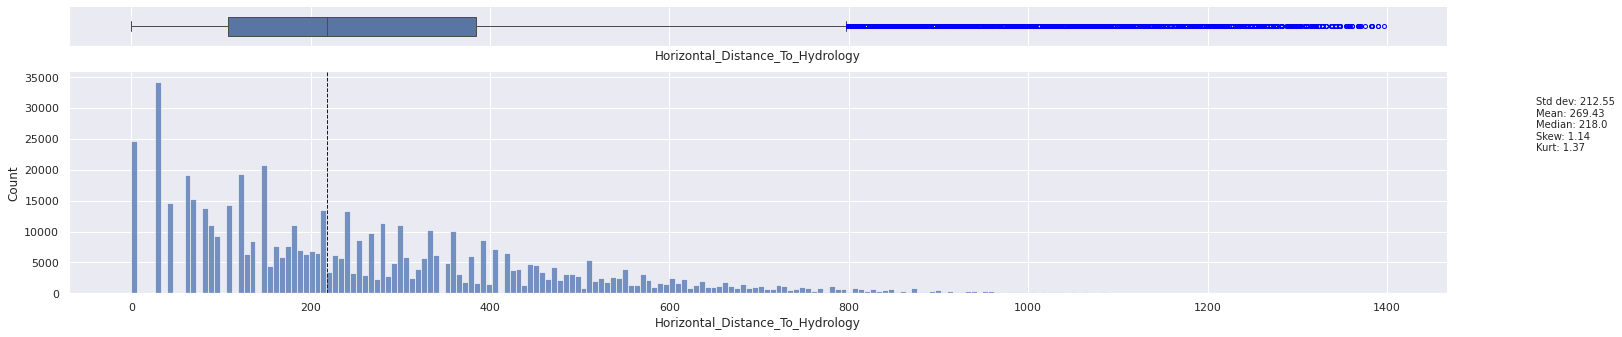

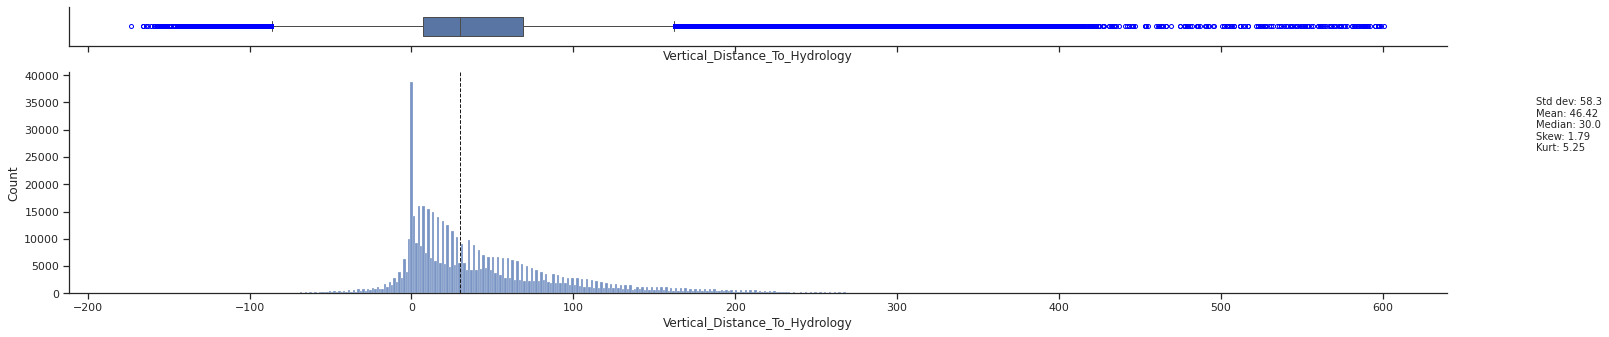

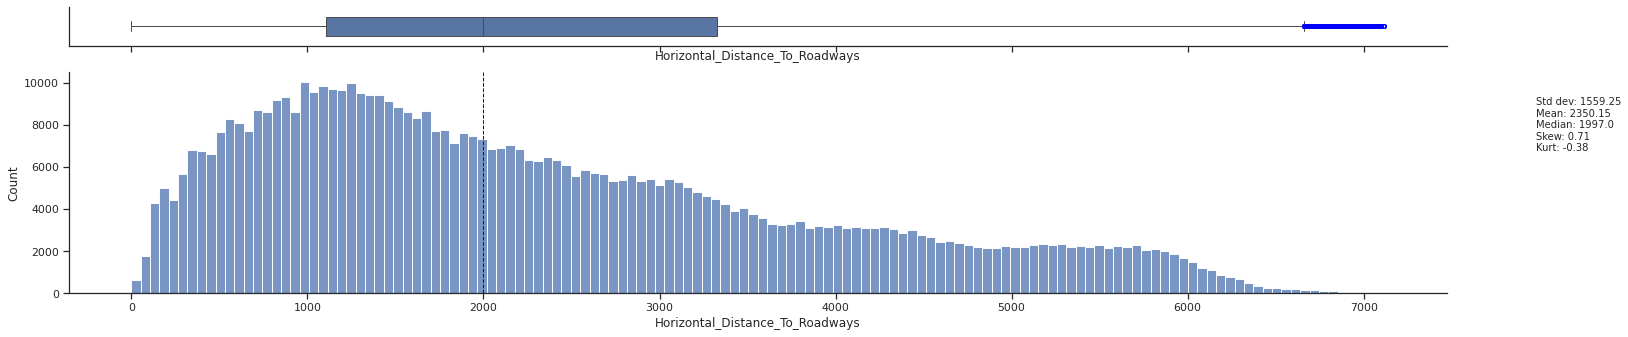

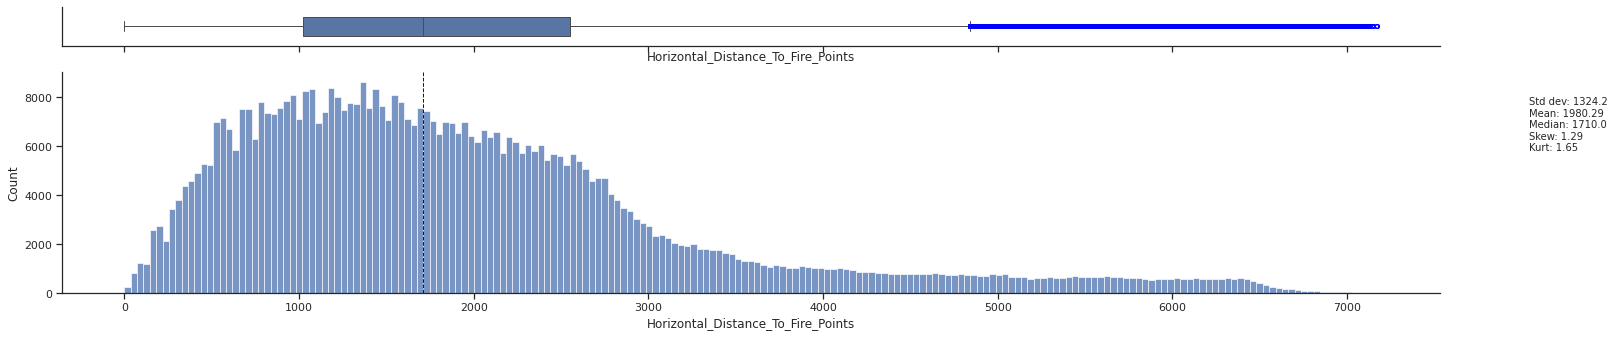

In [ ]:
# use function to plot box and histogram for all distance variables

distance = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
distance_df=forest_cover_type[distance]

for col in distance_df.columns[:]:
    histogram_and_boxplot(distance_df[col])

## Explore Joint Attributes
Looking at the scatter matrix below, there are a few interesting trends to highlight. First, Elevation looks to have somewhat of a positive relationship with the Horizontal and Vertical Distance to Hydrology. This is likely caused by the decrease in rivers, streams, and lakes at higher elevations in a mountain range.

Another interesting takeaway is comparing the Aspect of the slope to the Hillshade at 9am, Noon, and 3pm. This shows how the sunlight a plot of land changes throughout the day, with Southeast facing slopes receiving more light in the morning and Northwest facing slopes receiving more light in the afternoon.

As expected, there is potential positive relationship between the Horizontal and Vertical Distance to Hydrology. Due to the fact that these both look to be correlated with Elevation, care should be taken to make sure they are not too correlated.

In [ ]:

g = sns.pairplot(continuous_variables_df,diag_kind='kde')
g.map_lower(sns.kdeplot,color='.2')


In [ ]:
# Correlation df
cormat = forest_cover_type.corr()
# Round to two decimals
round(cormat, 2)

# Maybe try to subset this a little?
# heatmap of the correlations
matrix = np.triu(np.ones_like(cormat, dtype=bool))
sns.heatmap(cormat, annot = True, mask = matrix);

The correlation heatmap allows for easy visual recognition of which features are correlated with other features. This heatmap also shows the correlation as being positive or negative. This will help in future analysis and testing. 

We are able to see the high correlation between 

*   'Hillside_9am' - 'Hillside_3pm'
*   'Hillside_3pm' - 'Aspect'
*   'Horizontal_Distance_To_Hydrology' - 'Vertical_Distance_To_Hydrology'

We can further explore these correlations a little later. 

In [ ]:
aPlot = sns.violinplot(x = 'Cover_Type',
                       y = 'Aspect',
                       data = aspectDF)

aPlot.set_xticklabels(aPlot.get_xticklabels(),
                      rotation = 45,
                      horizontalalignment = 'right')



plt.show()

## Explore Attributes and Class

The violinplot above shows the distribution of the different cover types for the aspect of the plot of land containing that cover type. While it appears that most of the cover types were found at every aspect, there are some interesting trends. Aspen cover and Cottonwood/Willow look to mostly be on East facing slopes. Lodgepole Pine and Spruce/Fir favoring North facing slopes, while Douglas-fir are heavily concentrated facing North. Also, Southwest faces seem to have the smallest concentration of any cover type, but was also the least represented aspect in the dataset.

Since Aspen, Cottonwood, and Willow trees are deciduous they likely receive more sun on South facing aspects which could lead to them being the dominant cover type. Conversely, Lodgepole Pine, Spruce, Fir, Ponderosa Pine, and Douglas-fir are all confierous evergreen trees prefer light shade and could lead to them being more prevalent on North facing slopes.

In [ ]:
aPlot2 = sns.FacetGrid(aspectDF,
                       col = 'Cover_Type',
                       col_wrap = 4)

aPlot2.map(sns.histplot, 
           'Cardinal',
           stat = 'percent')
plt.show()

In [ ]:
plt.figure(figsize = (16, 8))
sns.countplot(data = forest_cover_type, 
              x = 'Soil_Type', 
              hue = 'Cover_Type')
plt.xticks(rotation = 90)
plt.show()

The above graph shows us that a vast majority of observations came from Wilderness areas "Rawah" and "Comanche Peak". That could skew the findings a little due to such a large difference in sampling. These two areas have almost 200,000 more observations than the other two areas. 

That being said, in these two highly observed areas, we see a very large connection between area and cover type. We will have to run further tests to identify if they are correlated statistically. 


##### Questions we will be looking into in future analysis:
- Does this sampling have enough randomness to it? 
- Do we need to sample more from the lower two wilderness areas? 
- Does having so many observations under the 'Lodgepole Pine' and the 'Spruce/Fir' cover types affect/alter the potential for modeling in the future? 
- Does it skew the data too much?

In [ ]:
sns.displot(x = 'Slope',
            hue = 'Cover_Type',
            kind = 'kde',
            multiple = 'fill',
            data = forest_cover_type)
plt.show()

The Kernel Density Estimate plot above shows the density of certain cover types at different slope angles. Lodgepole Pines and Spruce/Fir make up the majority of the cover on slopes less than around 25 degrees. Between slopes of around 25 degrees to just less than 50 degrees, Ponderosa Pine represent a significant portion of the cover type. Aspen and Douglas-fir also see an increase in cover type around a slope of 50 degrees. While there were very few samples containing slopes of 60 degrees are greater, the only cover type that appeared at this high slope angle are Lodgepole Pines.

In [ ]:
sns.countplot(data = forest_cover_type, x = 'Wilderness_Area', hue = 'Cover_Type')
plt.show()

In [ ]:
forest_cover_type['Soil_Type'].value_counts()

This graph and table show us that some soil types only have a handful of observations, whereas some have tens of thousands. We can see that "Soil_Type29" has 115,247 observations. This is equal to 19.835% of the total data. The smallest sample, "Soil_Type15", only holds 0.000516% of the total data. 

We will need to be mindful of the large difference in sampling from the soil types. This could greatly affect the outcome of future modeling, correlation assumptions, and findings.

Looking at the scatter matrix above, there are a few interesting trends to highlight. First, Elevation looks to have somewhat of a positive relationship with the Horizontal and Vertical Distance to Hydrology. This is likely caused by the decrease in rivers, streams, and lakes at higher elevations in a mountain range.

Another interesting takeaway is comparing the Aspect of the slope to the Hillshade at 9am, Noon, and 3pm. This shows how the sunlight a plot of land changes throughout the day, with Southeast facing slopes receiving more light in the morning and Northwest facing slopes receiving more light in the afternoon.

As expected, there is potential positive relationship between the Horizontal and Vertical Distance to Hydrology. Due to the fact that these both look to be correlated with Elevation, care should be taken to make sure they are not too correlated.

## New Features
- Kendall

In [ ]:
Soil=forest_cover_type['Soil_Type']
Soil_df
forest_cover_type['climatic_zone'] = Soil.replace('Soil_Type', '')
forest_cover_type

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area,climatic_zone
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Soil_Type29,Rawah,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Soil_Type29,Rawah,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Soil_Type12,Rawah,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Soil_Type30,Rawah,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Soil_Type29,Rawah,Soil_Type29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,Ponderosa Pine,Soil_Type2,Comanche Peak,Soil_Type2
581008,2391,152,19,67,12,95,240,237,119,845,Ponderosa Pine,Soil_Type2,Comanche Peak,Soil_Type2
581009,2386,159,17,60,7,90,236,241,130,854,Ponderosa Pine,Soil_Type2,Comanche Peak,Soil_Type2
581010,2384,170,15,60,5,90,230,245,143,864,Ponderosa Pine,Soil_Type2,Comanche Peak,Soil_Type2


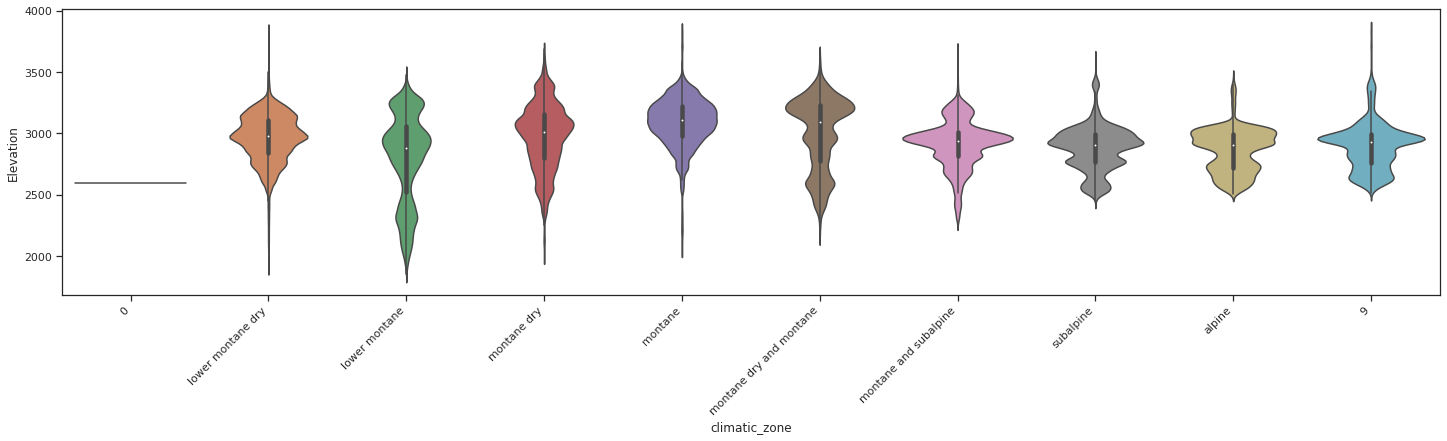

In [ ]:


forest_cover_type['climatic_zone'] = forest_cover_type['climatic_zone'].str.replace('1','lower montane dry')
forest_cover_type['climatic_zone'] = forest_cover_type['climatic_zone'].str.replace('2','lower montane')
forest_cover_type['climatic_zone'] = forest_cover_type['climatic_zone'].str.replace('3','montane dry')
forest_cover_type['climatic_zone'] = forest_cover_type['climatic_zone'].str.replace('4','montane')
forest_cover_type['climatic_zone'] = forest_cover_type['climatic_zone'].str.replace('5','montane dry and montane')
forest_cover_type['climatic_zone'] = forest_cover_type['climatic_zone'].str.replace('6','montane and subalpine')
forest_cover_type['climatic_zone'] = forest_cover_type['climatic_zone'].str.replace('7','subalpine')
forest_cover_type['climatic_zone'] = forest_cover_type['climatic_zone'].str.replace('8','alpine')

aPlot = sns.violinplot(x = 'climatic_zone',
                       y = 'Elevation',
                       data = forest_cover_type)

aPlot.set_xticklabels(aPlot.get_xticklabels(),
                      rotation = 45,
                      horizontalalignment = 'right')



plt.show()

## Exceptional Work

In [ ]:
# https://realpython.com/logistic-regression-python/#logistic-regression-in-python

# Assign specific features to two different variables
X = forest_cover_type_copy.iloc[:, 0:12]
y = forest_cover_type_copy.iloc[:, 12]

In [ ]:
# https://realpython.com/logistic-regression-python/#logistic-regression-in-python

# Assign specific features to two different variables
X = forest_cover_type_copy.iloc[:, 0:12]
y = forest_cover_type_copy.iloc[:, 12]
# Build a logistic regression model
model = LogisticRegression(solver = 'liblinear', random_state = 0)
model = model.fit(X, y)

In [ ]:
model.classes_
# See the model results
print(model.predict_proba(X), '\n')
print(model.predict(X), '\n')

print('The model score is ', model.score(X, y), '\n')
# this gives a 67.256% to our model

print(classification_report(y, model.predict(X)), '\n')

[[9.99846561e-01 1.53439491e-04]
 [9.99811414e-01 1.88585941e-04]
 [9.99298143e-01 7.01856673e-04]
 ...
 [5.62994245e-01 4.37005755e-01]
 [5.69882603e-01 4.30117397e-01]
 [5.33474632e-01 4.66525368e-01]] 

[0 0 0 ... 0 0 0] 

The model score is  0.9870088741712736 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    327648
           1       0.98      0.99      0.99    253364

    accuracy                           0.99    581012
   macro avg       0.99      0.99      0.99    581012
weighted avg       0.99      0.99      0.99    581012
 



[[322919   4729]
 [  2819 250545]] 



IndexError: ignored

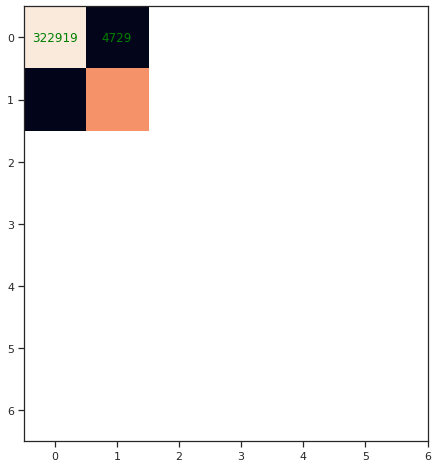

In [ ]:
print(confusion_matrix(y, model.predict(X)), '\n')

cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1, 2, 3, 4, 5, 6))
ax.yaxis.set(ticks = (0, 1, 2, 3, 4, 5, 6))
ax.set_ylim(6.5, -0.5)
for i in range(7):
    for j in range(7):
        ax.text(j, 
                i, 
                cm[i, j], 
                ha = 'center', 
                va = 'center', 
                color = 'Green')
plt.show()

The model has good prediction cabailities in the first cover types - Spruce/Fir and Lodgepole Pine. That being said, it also incorrectly predicts those two quite a bit. This could be due to what we predicted earlier - the vastly large number of observations of these two specific cover types. We saw that approximately 80% of observations were one of these two cover types. That allows us to predict a very large number of them in our model. 

We also have to be mindful about the above visualization. The numbering is off by one. To fully and truly understand what is being represented, you have to add one to each number. So, if you see a 0 on the plot, that is actually cover_type1.

We also have to be cognizant of the model never predicting cover_type5. That shows us, in the results, all zeros. Maybe we can look into some of those observations that really are Cover_Type5 and try to identify any unique trends or patterns. This could help us increase our models perfromance metrics. 

In [ ]:
# print the metrics used to evaluate the model
print(classification_report(y, model.predict(X)))

In [ ]:
# model with higher C value. default was c = 1


model = LogisticRegression(solver = 'liblinear', 
                           C = 10.0, 
                           random_state = 0)
model.fit(X, y)


print('The model score is ', model.score(X, y), '\n')

# print the metrics used to evaluate the model
print(classification_report(y, model.predict(X)))

A high value of C tells the model to give more weight to the training data. A lower value of C will indicate the model to give complexity more weight at the cost of fitting the data. Thus, a high Hyper Parameter value C indicates that training data is more important and reflects the real world data, whereas low value is just the opposite of this.

We do not see a change in accuracy score between the two models. 